===== BASIC SUMMARY =====
  Brand_Type  Search Term Count  Clicks      Cost  Conversions        CPA
0      Brand                377  2460.0   1723.60      1311.75   1.313970
1  Non-Brand              47188  4967.0  24927.36       918.58  27.136842


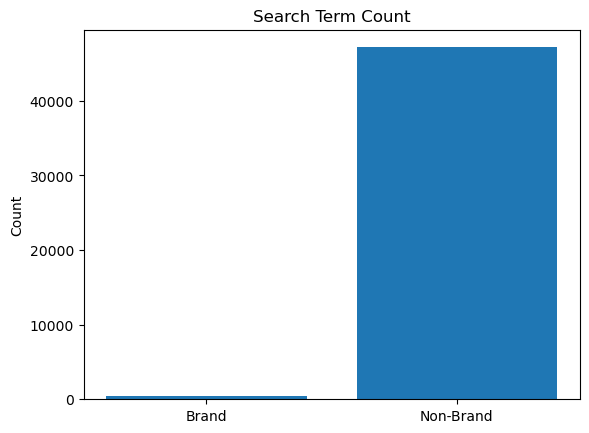

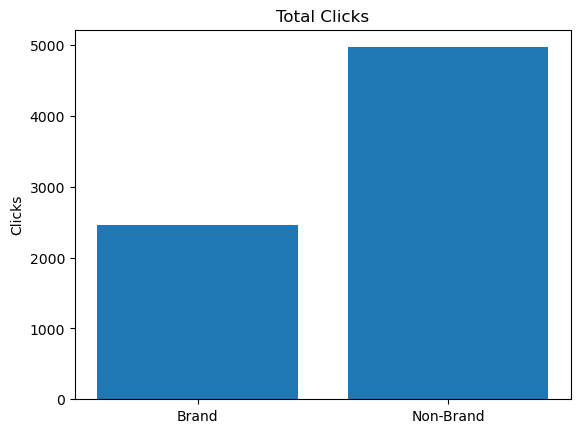

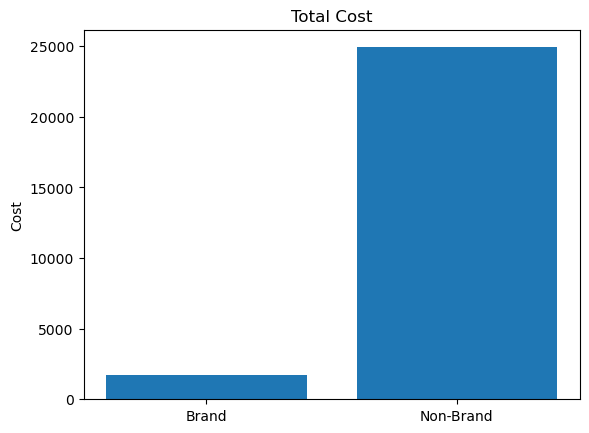

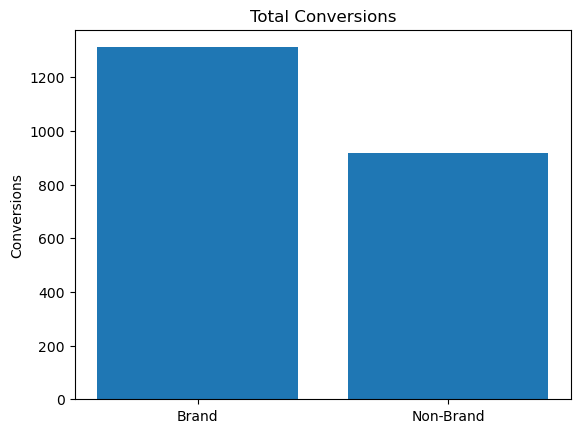

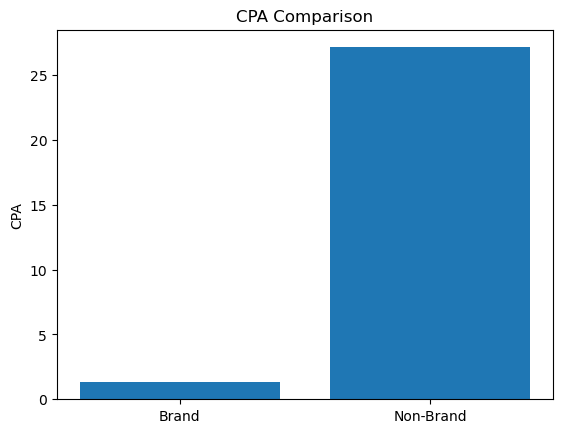

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. LOAD DATA
# ==============================

df = pd.read_csv("Search terms report2.csv", skiprows=2)
df.columns = [col.strip() for col in df.columns]

# Convert numeric columns
df["Clicks"] = pd.to_numeric(df["Clicks"], errors="coerce")
df["Cost"] = pd.to_numeric(df["Cost"], errors="coerce")
df["Conversions"] = pd.to_numeric(df["Conversions"], errors="coerce")

# ==============================
# 2. CLASSIFY BRAND
# ==============================

brand_terms = ["vrs"]

df["Brand_Type"] = df["Search term"].astype(str).str.lower().apply(
    lambda x: "Brand" if any(term in x for term in brand_terms) else "Non-Brand"
)

# ==============================
# 3. BASIC COUNTS
# ==============================

summary = df.groupby("Brand_Type").agg({
    "Search term": "count",
    "Clicks": "sum",
    "Cost": "sum",
    "Conversions": "sum"
}).reset_index()

summary.rename(columns={"Search term": "Search Term Count"}, inplace=True)

# Calculate CPA safely
summary["CPA"] = summary.apply(
    lambda row: row["Cost"] / row["Conversions"] if row["Conversions"] > 0 else 0,
    axis=1
)

print("===== BASIC SUMMARY =====")
print(summary)

# ==============================
# 4. VISUALIZATIONS
# ==============================

# --- Search Term Count ---
plt.figure()
plt.bar(summary["Brand_Type"], summary["Search Term Count"])
plt.title("Search Term Count")
plt.ylabel("Count")
plt.show()

# --- Click Share ---
plt.figure()
plt.bar(summary["Brand_Type"], summary["Clicks"])
plt.title("Total Clicks")
plt.ylabel("Clicks")
plt.show()

# --- Cost Share ---
plt.figure()
plt.bar(summary["Brand_Type"], summary["Cost"])
plt.title("Total Cost")
plt.ylabel("Cost")
plt.show()

# --- Conversion Share ---
plt.figure()
plt.bar(summary["Brand_Type"], summary["Conversions"])
plt.title("Total Conversions")
plt.ylabel("Conversions")
plt.show()

# --- CPA Comparison ---
plt.figure()
plt.bar(summary["Brand_Type"], summary["CPA"])
plt.title("CPA Comparison")
plt.ylabel("CPA")
plt.show()

===== SHARE ANALYSIS =====
  Brand_Type  Click Share (%)  Cost Share (%)  Conversion Share (%)        CPA
0      Brand        33.122391        6.467309             58.814167   1.313970
1  Non-Brand        66.877609       93.532691             41.185833  27.136842


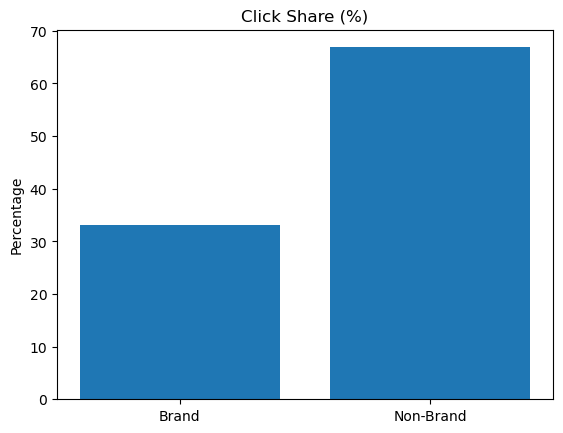

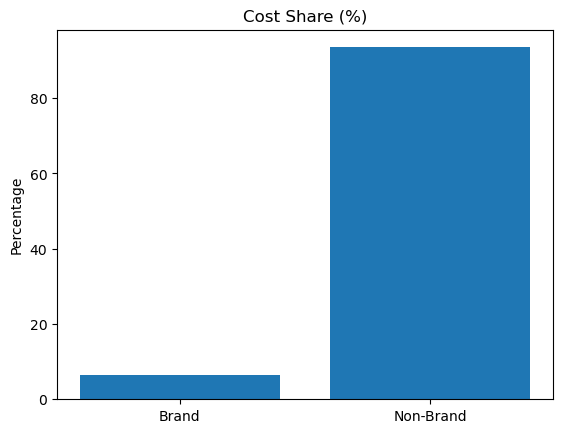

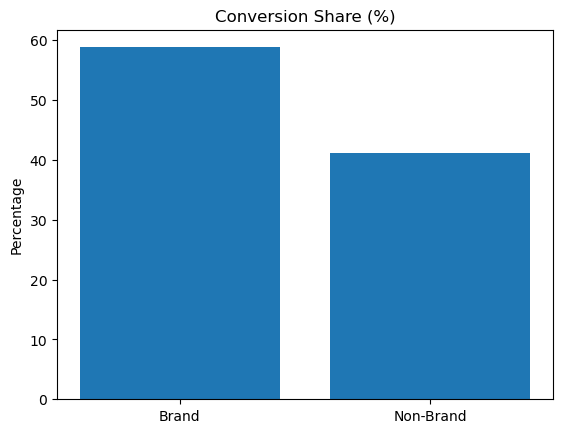

In [10]:
# ==============================
# SHARE ANALYSIS
# ==============================

# Calculate total sums
total_clicks = summary["Clicks"].sum()
total_cost = summary["Cost"].sum()
total_conversions = summary["Conversions"].sum()

# Calculate share %
summary["Click Share (%)"] = summary["Clicks"] / total_clicks * 100
summary["Cost Share (%)"] = summary["Cost"] / total_cost * 100
summary["Conversion Share (%)"] = summary["Conversions"] / total_conversions * 100

print("===== SHARE ANALYSIS =====")
print(summary[[
    "Brand_Type",
    "Click Share (%)",
    "Cost Share (%)",
    "Conversion Share (%)",
    "CPA"
]])

# ------------------------------
# VISUALIZE SHARE STRUCTURE
# ------------------------------

import matplotlib.pyplot as plt

# Click Share
plt.figure()
plt.bar(summary["Brand_Type"], summary["Click Share (%)"])
plt.title("Click Share (%)")
plt.ylabel("Percentage")
plt.show()

# Cost Share
plt.figure()
plt.bar(summary["Brand_Type"], summary["Cost Share (%)"])
plt.title("Cost Share (%)")
plt.ylabel("Percentage")
plt.show()

# Conversion Share
plt.figure()
plt.bar(summary["Brand_Type"], summary["Conversion Share (%)"])
plt.title("Conversion Share (%)")
plt.ylabel("Percentage")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Load Data
# ==============================

df = pd.read_csv("Search terms report.csv", skiprows=2)
df.columns = [col.strip() for col in df.columns]

# Convert numeric columns
df["Clicks"] = pd.to_numeric(df["Clicks"], errors="coerce")
df["Conversions"] = pd.to_numeric(df["Conversions"], errors="coerce")

# ==============================
# 2. Classify Brand vs Non-Brand
# ==============================

brand_terms = ["vrs"]

df["Brand_Type"] = df["Search term"].astype(str).str.lower().apply(
    lambda x: "Brand" if any(term in x for term in brand_terms) else "Non-Brand"
)

# ==============================
# 3. Aggregate Data
# ==============================

summary = df.groupby("Brand_Type").agg({
    "Clicks": "sum",
    "Conversions": "sum"
}).reset_index()

# ==============================
# 4. Calculate Conversion Rate
# ==============================

summary["Conversion Rate (%)"] = summary.apply(
    lambda row: (row["Conversions"] / row["Clicks"]) * 100 if row["Clicks"] > 0 else 0,
    axis=1
)

print(summary)

# ==============================
# 5. Visualization
# ==============================

plt.figure()
plt.bar(summary["Brand_Type"], summary["Conversion Rate (%)"])
plt.xlabel("Segment")
plt.ylabel("Conversion Rate (%)")
plt.title("Brand vs Non-Brand Conversion Rate")
plt.show()

===== CONVERSION RATE SUMMARY =====
  Brand_Type  Clicks  Conversions  Conversion Rate (%)
0      Brand  2460.0      1311.75            53.323171
1  Non-Brand  4967.0       918.58            18.493658

Brand Conversion Rate: 53.32%
Non-Brand Conversion Rate: 18.49%
Difference (Brand - Non-Brand): 34.83%


  Brand_Type  Clicks  Conversions  Conversion Rate (%)
0      Brand  2460.0      1311.75            53.323171
1  Non-Brand  4967.0       918.58            18.493658


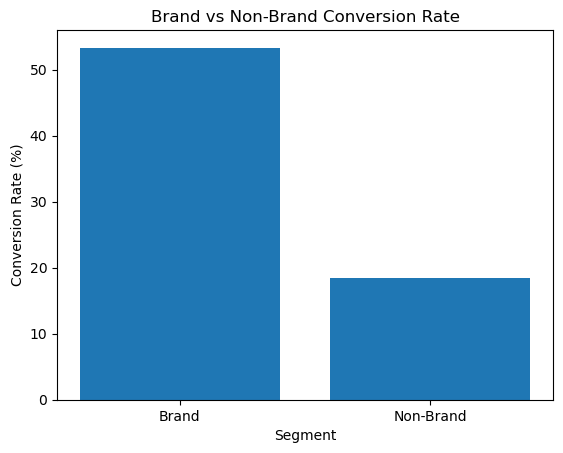

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# 1. Load Data
# ==============================

df = pd.read_csv("Search terms report2.csv", skiprows=2)
df.columns = [col.strip() for col in df.columns]

# Convert numeric columns
df["Clicks"] = pd.to_numeric(df["Clicks"], errors="coerce")
df["Conversions"] = pd.to_numeric(df["Conversions"], errors="coerce")

# ==============================
# 2. Classify Brand vs Non-Brand
# ==============================

brand_terms = ["vrs"]

df["Brand_Type"] = df["Search term"].astype(str).str.lower().apply(
    lambda x: "Brand" if any(term in x for term in brand_terms) else "Non-Brand"
)

# ==============================
# 3. Aggregate Data
# ==============================

summary = df.groupby("Brand_Type").agg({
    "Clicks": "sum",
    "Conversions": "sum"
}).reset_index()

# ==============================
# 4. Calculate Conversion Rate
# ==============================

summary["Conversion Rate (%)"] = summary.apply(
    lambda row: (row["Conversions"] / row["Clicks"]) * 100 if row["Clicks"] > 0 else 0,
    axis=1
)

print(summary)

# ==============================
# 5. Visualization
# ==============================

plt.figure()
plt.bar(summary["Brand_Type"], summary["Conversion Rate (%)"])
plt.xlabel("Segment")
plt.ylabel("Conversion Rate (%)")
plt.title("Brand vs Non-Brand Conversion Rate")
plt.show()